In [1]:
"""Run an simple experiment locally without using config file.

This file is presented as a very simple entry point to code.
For running any meaningful experiments, we suggest `batch_runner.py` or
`local_runner.py`.
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys

import numpy as np
import pandas as pd
import plotnine as gg
from plotnine import *

from base.experiment import BaseExperiment
from finite_arm.agent_finite import FiniteBernoulliBanditTS, DriftingFiniteBernoulliBanditTS, FiniteBernoulliBanditLangevin

from finite_arm.env_finite import DriftingFiniteArmedBernoulliBandit, FiniteArmedBernoulliBandit

import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.getcwd())

##############################################################################
# Running a single experiment

probs = [0.1, 0.2, 0.3, 0.4]
n_arm = len(probs) 
n_steps = 150
seed = 0

agent = FiniteBernoulliBanditTS(n_arm)
env = FiniteArmedBernoulliBandit(probs)
experiment = BaseExperiment(
    agent,
    env,
    n_steps=n_steps,
    seed=seed,
    unique_id='example',
    evaluation_pause=25
)

experiment.run_experiment()

##############################################################################
# Simple display / plot of results

display(experiment.results.head(n=16))



,action,cum_regret,expected_reward,instant_regret,observation,pmean0,pmean1,pmean2,pmean3,prob0,prob1,prob2,prob3,stochastic_reward,t,unique_id
0,0,NaN,0.1,NaN,4,0.2,0.2,0.2,0.2,0.266320,0.267712,0.265968,0.2,0,1,example
1,0,NaN,0.1,NaN,4,0.2,0.2,0.2,0.2,0.267744,0.265208,0.267048,0.2,0,2,example
2,1,NaN,0.2,NaN,4,0.2,0.2,0.2,0.2,0.266064,0.268360,0.265576,0.2,1,3,example
3,1,NaN,0.2,NaN,4,0.2,0.2,0.2,0.2,0.266344,0.267760,0.265896,0.2,0,4,example
4,2,NaN,0.3,NaN,4,0.2,0.2,0.2,0.2,0.266584,0.265928,0.267488,0.2,0,5,example
5,0,NaN,0.1,NaN,4,0.2,0.2,0.2,0.2,0.267144,0.266848,0.266008,0.2,1,6,example
6,1,NaN,0.2,NaN,4,0.2,0.2,0.2,0.2,0.265544,0.267336,0.267120,0.2,0,7,example
7,2,NaN,0.3,NaN,4,0.2,0.2,0.2,0.2,0.265392,0.265600,0.269008,0.2,1,8,example
8,1,NaN,0.2,NaN,4,0.2,0.2,0.2,0.2,0.269760,0.265488,0.264752,0.2,0,9,example
9,0,NaN,0.1,NaN,4,0.2,0.2,0.2,0.2,0.266440,0.266672,0.266888,0.2,0,10,example


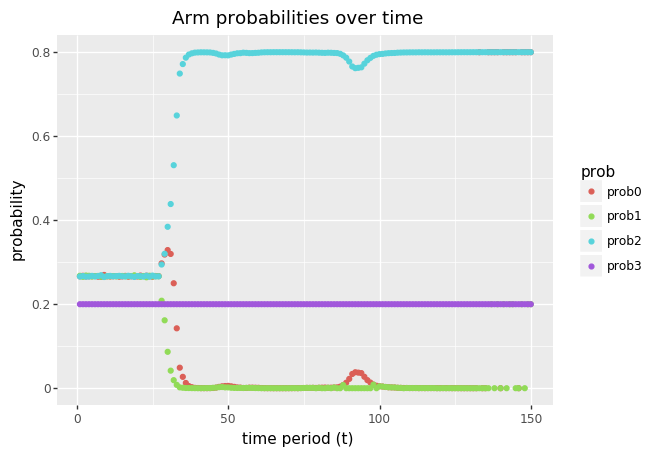

<ggplot: (8759227169519)>

In [16]:
series = ['prob{}'.format(i) for i in range(n_arm)]
df = experiment.results.melt(
    id_vars=['t'],
    value_vars=series,
    var_name='prob',
    value_name='count'
)

probabilities = (ggplot(df) 
                 + aes('t', 'count', color='prob', group='prob') 
                 + gg.labels.ggtitle('Arm probabilities over time')
                 + gg.xlab('time period (t)')
                 + gg.ylab('probability')
                 + geom_point())
display(probabilities)

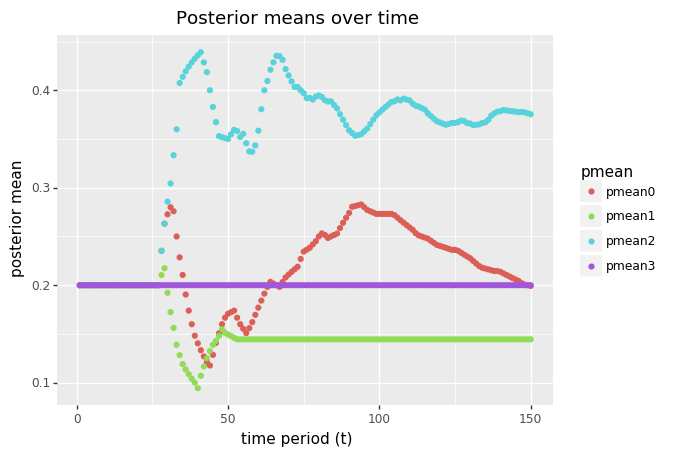

<ggplot: (-9223363277627675981)>

In [17]:
series = ['pmean{}'.format(i) for i in range(n_arm)]
df = experiment.results.melt(
    id_vars=['t'],
    value_vars=series,
    var_name='pmean',
    value_name='count'
)

posterior_means = (ggplot(df) 
                   + aes('t', 'count', color='pmean', group='pmean') 
                   + gg.labels.ggtitle('Posterior means over time')
                   + gg.xlab('time period (t)')
                   + gg.ylab('posterior mean')
                   + geom_point())
display(posterior_means)

In [4]:
display(experiment.results.tail(n=16))

,action,cum_regret,expected_reward,instant_regret,observation,pmean0,pmean1,pmean2,pmean3,prob0,prob1,prob2,prob3,stochastic_reward,t,unique_id
134,2,125.4,0.3,0.1,4,0.217054,0.144444,0.367201,0.2,0.000008,0.000008,0.799984,0.2,0,135,example
135,0,126.6,0.1,0.3,4,0.216216,0.144444,0.369718,0.2,0.799992,0.000008,0.799992,0.2,1,136,example
136,0,127.6,0.1,0.3,4,0.215385,0.144444,0.373913,0.2,0.800000,0.200000,0.800000,0.2,0,137,example
137,2,128.8,0.3,0.1,4,0.214559,0.144444,0.376289,0.2,0.799992,0.000008,0.799992,0.2,1,138,example
138,2,130.0,0.3,0.1,4,0.214559,0.144444,0.377966,0.2,0.800000,0.200000,0.800000,0.2,0,139,example
139,2,131.4,0.3,0.1,4,0.213740,0.144444,0.378559,0.2,0.000008,0.000008,0.799992,0.2,1,140,example
140,2,132.8,0.3,0.1,4,0.212121,0.144444,0.379768,0.2,0.800000,0.200000,0.800000,0.2,1,141,example
141,0,134.4,0.1,0.3,4,0.210526,0.144444,0.379310,0.2,0.799992,0.000008,0.799992,0.2,0,142,example
142,2,135.6,0.3,0.1,4,0.208955,0.144444,0.378862,0.2,0.800000,0.200000,0.800000,0.2,0,143,example
143,2,136.4,0.3,0.1,4,0.207407,0.144444,0.378422,0.2,0.800000,0.200000,0.800000,0.2,0,144,example


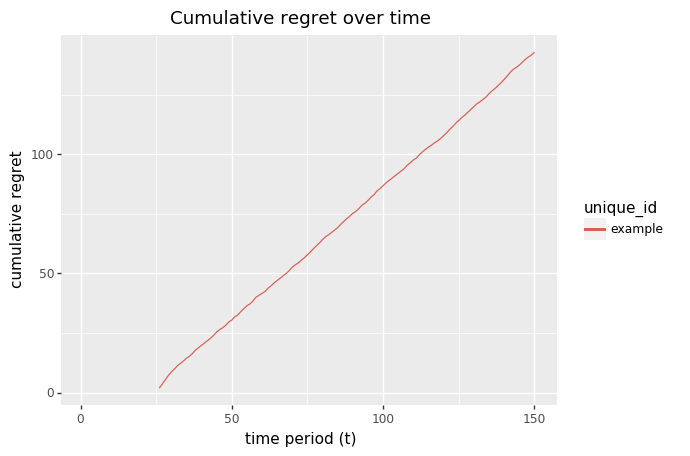

<ggplot: (8759227216886)>


In [12]:
p = (gg.ggplot(experiment.results)
     + gg.aes(x='t', y='cum_regret', colour='unique_id')
     + gg.labels.ggtitle('Cumulative regret over time')
     + gg.xlab('time period (t)')
     + gg.ylab('cumulative regret')
     + gg.geom_line())
print(p)

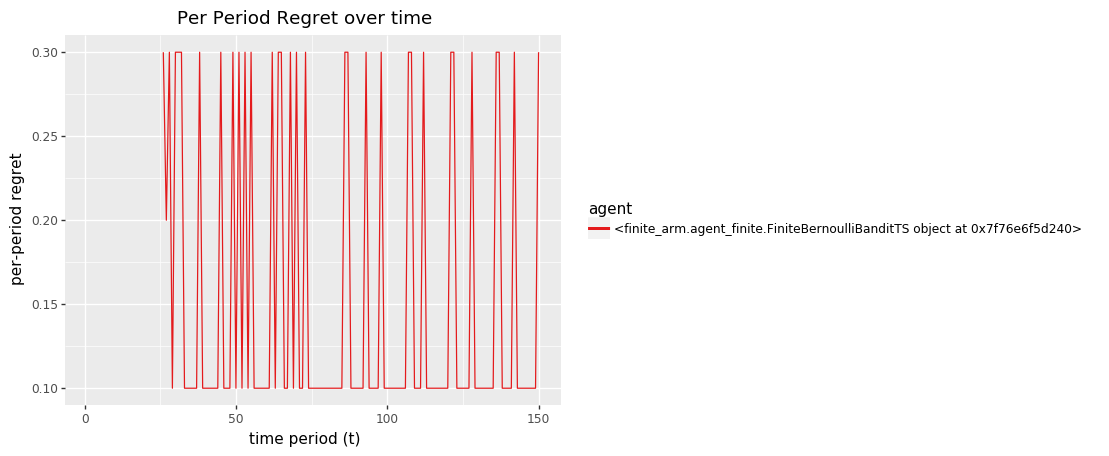

<ggplot: (8759227170105)>


In [15]:
p = (gg.ggplot(experiment.results)
       + gg.aes('t', 'instant_regret', colour='agent')
       + gg.labels.ggtitle('Per Period Regret over time')
       + gg.xlab('time period (t)')
       + gg.ylab('per-period regret')
       + gg.geom_line()
       + gg.scale_colour_brewer(name='agent', type='qual', palette='Set1'))

print(p)